In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='ISO-8859-1')
print(df.shape)


(11251, 15)


In [4]:
print(df.head(5))


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [5]:
df.head(10)  

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Data Cleaning

In [7]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
pd.isnull(df).sum()
df.dropna(inplace=True)

In [9]:
# Fill NaN values in the 'Amount' column with 0 before converting to integer
df['Amount'] = df['Amount'].fillna(0).astype(int)
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


Data Analysis

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

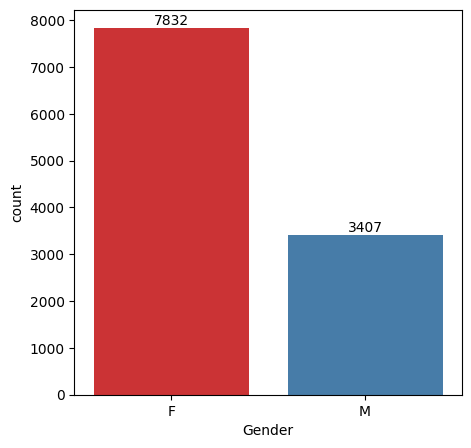

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Gender', data=df,hue='Gender', palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)

Most buyers are from Uttar Pradesh

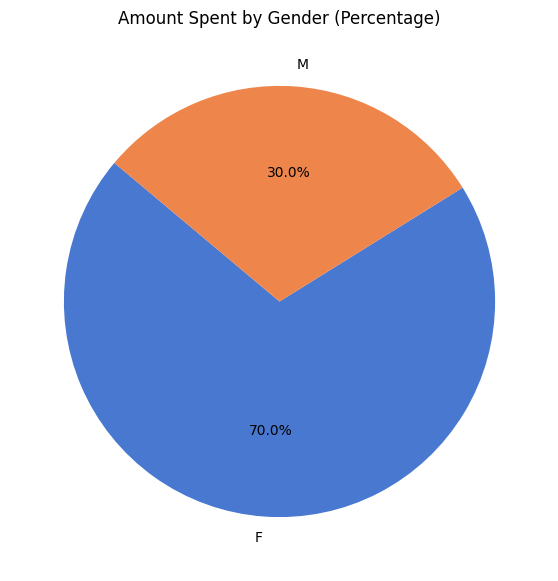

In [216]:
# Grouping data by Gender and summing the Amount
sales_gen = df.groupby(['Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sales_gen['Amount'], 
    labels=sales_gen['Gender'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('muted', len(sales_gen))
)
plt.title('Amount Spent by Gender (Percentage)')
plt.show()

Most buyers are female and most purchasing powers are of females

Comparing with AGE

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

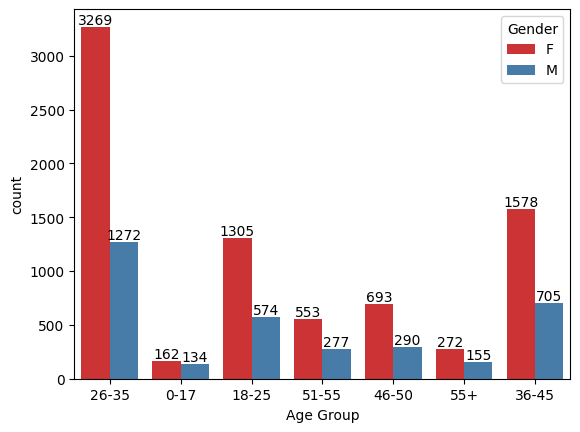

In [221]:
ax = sns.countplot(x='Age Group', data=df,hue='Gender', palette='Set1')
for bars in ax.containers:
    ax.bar_label(bars)

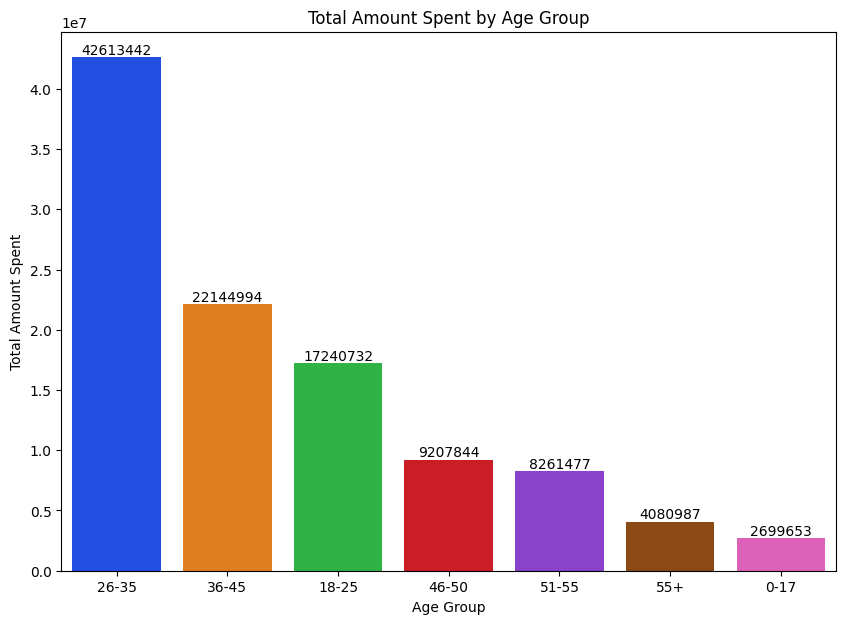

In [229]:
# Grouping data by Age Group and summing the Amount
age_group_sales = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).reset_index()

# Plotting the data
plt.figure(figsize=(10, 7))
sns.barplot(x='Age Group', y='Amount', data=age_group_sales,hue='Age Group', palette='bright')
plt.title('Total Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')

# Adding value labels on top of the bars
for index, row in age_group_sales.iterrows():
    plt.text(index, row['Amount'], f"{row['Amount']:.0f}", ha='center', va='bottom')

plt.show()

We can see most of our buyers are females from 26-35 age group

Comparing by Sales of state State

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

The state with the most orders is Uttar Pradesh with a 4807 orders.


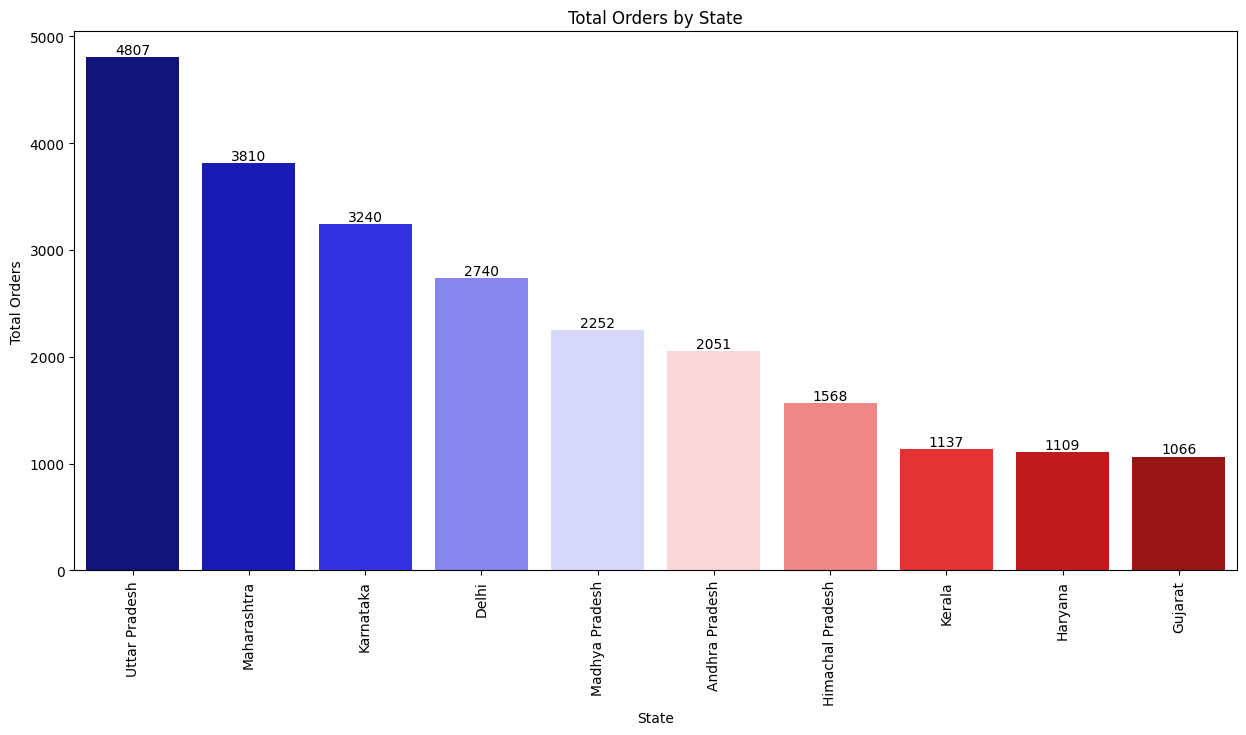

In [230]:
# Grouping data by State and summing the Amount
state_sales = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()

# Displaying the state with the highest sales
top_state = state_sales.iloc[0]
print(f"The state with the most orders is {top_state['State']} with a {top_state['Orders']} orders.")

# Plotting the data
plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='Orders', data=state_sales, hue='State',palette='seismic')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Total Orders')

# Adding value labels on top of the bars
for index, row in state_sales.iterrows():
    plt.text(index, row['Orders'], f"{row['Orders']:.0f}", ha='center', va='bottom')

plt.show()

Comparing with marital Status

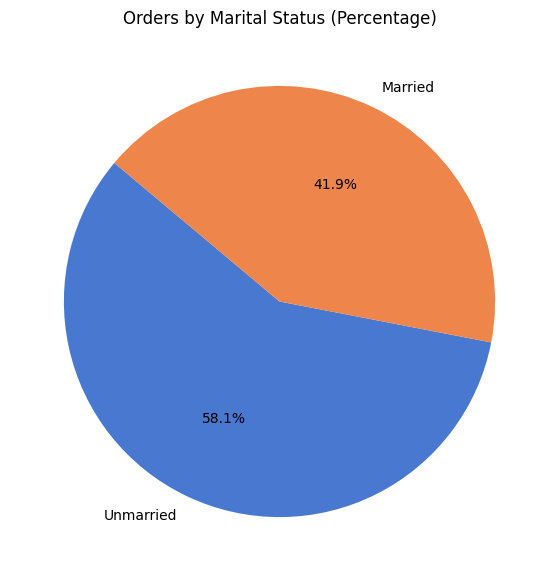

In [193]:
# Grouping data by Marital Status and summing the Orders
marital_status_orders = df.groupby('Marital_Status')['Orders'].sum().reset_index()

# Mapping 0 to 'Unmarried' and 1 to 'Married'
marital_status_orders['Marital_Status'] = marital_status_orders['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(
    marital_status_orders['Orders'], 
    labels=marital_status_orders['Marital_Status'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('muted', len(marital_status_orders))
)
plt.title('Orders by Marital Status (Percentage)')
plt.show()

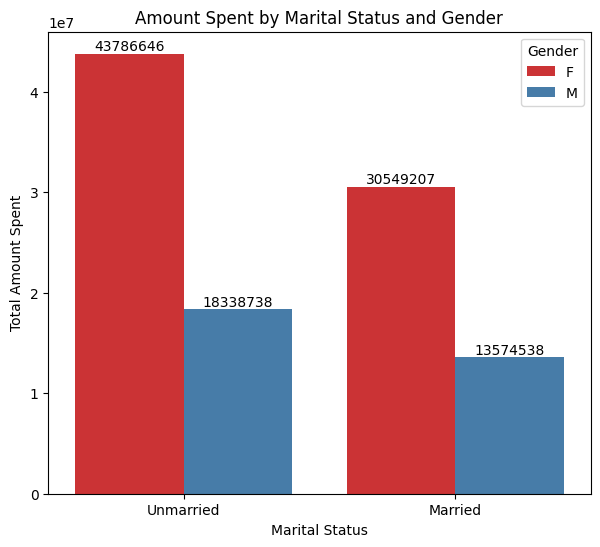

In [237]:
# Grouping data by Marital Status and Gender, and summing the Amount
marital_gender_sales = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

# Mapping 0 to 'Unmarried' and 1 to 'Married'
marital_gender_sales['Marital_Status'] = marital_gender_sales['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

# Plotting the data
plt.figure(figsize=(7, 6))
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=marital_gender_sales, palette='Set1')
plt.title('Amount Spent by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount Spent')

# Adding value labels on top of the bars
for bars in plt.gca().containers:
    plt.gca().bar_label(bars, fmt='%.0f')

plt.show()

Unmarried women has more purchasing power

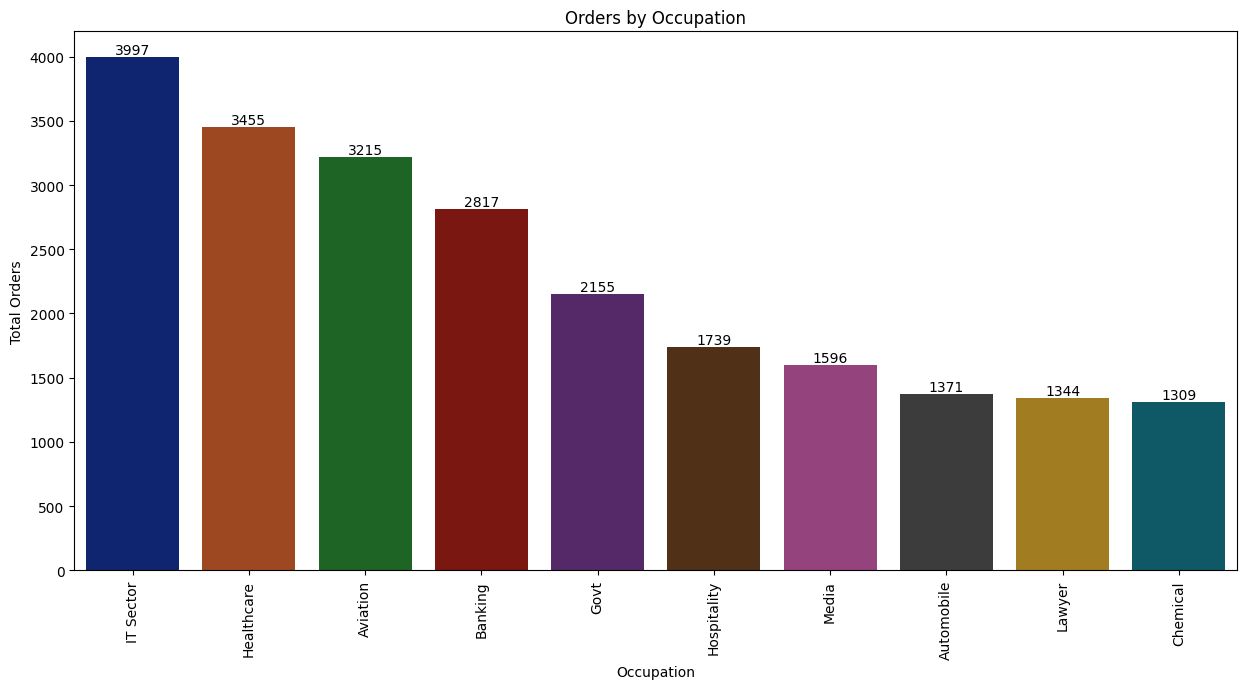

In [238]:
# Grouping data by Occupation and counting the number of orders
occupation_sales = df.groupby('Occupation')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting the data
plt.figure(figsize=(15, 7))
sns.barplot(x='Occupation', y='Orders', data=occupation_sales,hue='Occupation', palette='dark')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Orders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Orders')

# Adding value labels on top of the bars
for index, row in occupation_sales.iterrows():
    plt.text(index, row['Orders'], f"{row['Orders']:.0f}", ha='center', va='bottom')

plt.show()

Our top buyers are from IT Sector,Healthcare and Aviation occupation

In [104]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

The product category with the most sales is 'Clothing & Apparel' with 6634 orders.


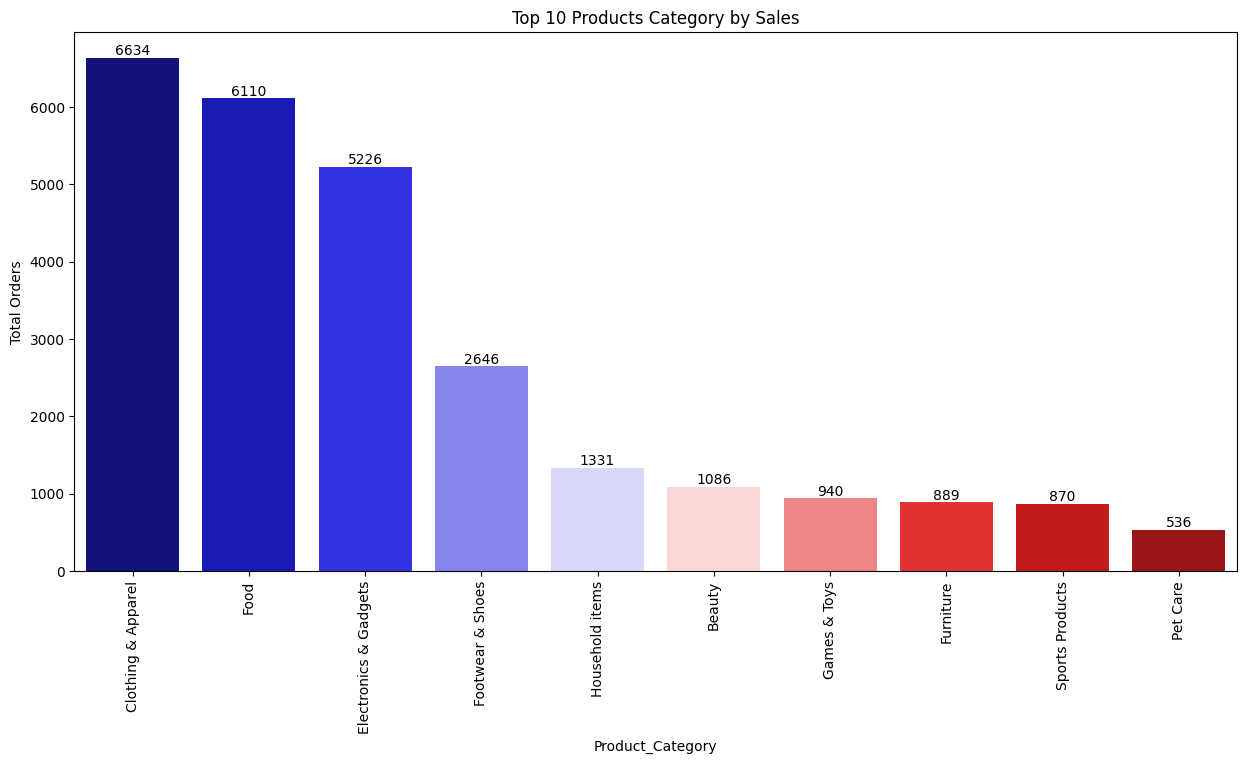

In [241]:
# Grouping data by Product Category and summing the Orders
product_sales = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).reset_index()

# Displaying the product category with the highest sales
top_product = product_sales.iloc[0]
print(f"The product category with the most sales is '{top_product['Product_Category']}' with {top_product['Orders']} orders.")

# Plotting the data
plt.figure(figsize=(15, 7))
sns.barplot(x='Product_Category', y='Orders', data=product_sales.head(10),hue='Product_Category', palette='seismic')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Top 10 Products Category by Sales')
plt.xlabel('Product_Category')
plt.ylabel('Total Orders')

# Adding value labels on top of the bars
for index, row in product_sales.head(10).iterrows():
    plt.text(index, row['Orders'], f"{row['Orders']:.0f}", ha='center', va='bottom')

plt.show()

The product category with the highest profit is 'Food' with a total profit of 33933.883k.


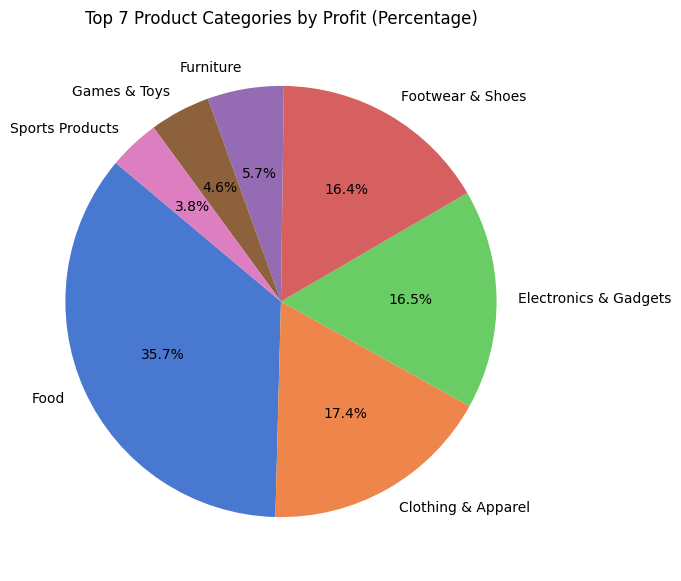

In [242]:
# Grouping data by Product Category and summing the Amount
product_profit = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index()

# Displaying the product category with the highest profit
top_category = product_profit.iloc[0]
print(f"The product category with the highest profit is '{top_category['Product_Category']}' with a total profit of {top_category['Amount']/1000}k.")

# Selecting the top 10 product categories
top_7_product_profit = product_profit.head(7)

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    top_7_product_profit['Amount'], 
    labels=top_7_product_profit['Product_Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('muted', len(top_7_product_profit))
)
plt.title('Top 7 Product Categories by Profit (Percentage)')
plt.show()

The product category with the highest profit is 'Food' with a total profit of 33933.883k.

The zone with the highest orders is 'Central' with 10623 orders and a total amount spent of 41600872.


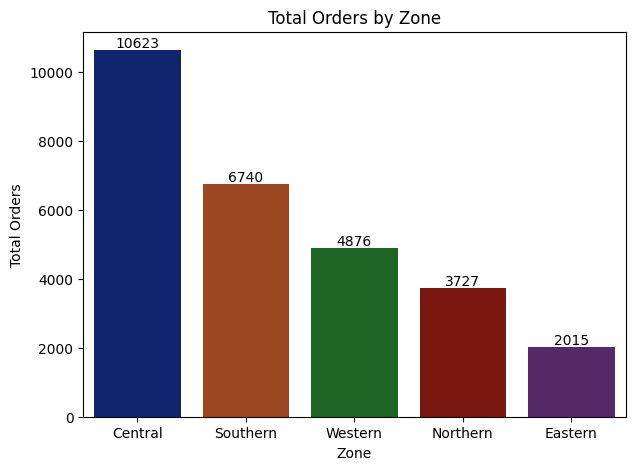

In [246]:
# Grouping data by Zone and calculating the total Orders and Amount
zone_sales = df.groupby('Zone')[['Orders', 'Amount']].sum().sort_values(by='Orders', ascending=False).reset_index()

# Displaying the zone with the highest orders and amount spent
top_zone = zone_sales.iloc[0]
print(f"The zone with the highest orders is '{top_zone['Zone']}' with {top_zone['Orders']} orders and a total amount spent of {top_zone['Amount']}.")

# Plotting the data for Orders
plt.figure(figsize=(7, 5))
sns.barplot(x='Zone', y='Orders', data=zone_sales,hue='Zone', palette='dark')
plt.title('Total Orders by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Orders')

# Adding value labels on top of the bars for Orders
for index, row in zone_sales.iterrows():
    plt.text(index, row['Orders'], f"{row['Orders']:.0f}", ha='center', va='bottom')

plt.show()